Bayesian Regression for the Olympic data
==

In [47]:
import numpy as np
import pylab as plt
%matplotlib inline

data = np.loadtxt('../olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]
x = (x - 1896)/4.0

sig_sq = 0.05 # Noise variance -- we assume this is fixed

# Define the prior over w
k = 1 # polynomial order

mu0 = np.zeros((k+1,1), dtype=np.float)
sig0 = 100*np.identity(k+1, dtype=np.float)

[[-4.      -3.90125 -3.805   ... -3.71125 -3.805   -3.90125]
 [-3.90125 -3.8025  -3.70625 ... -3.6125  -3.70625 -3.8025 ]
 [-3.805   -3.70625 -3.61    ... -3.51625 -3.61    -3.70625]
 ...
 [-3.71125 -3.6125  -3.51625 ... -3.4225  -3.51625 -3.6125 ]
 [-3.805   -3.70625 -3.61    ... -3.51625 -3.61    -3.70625]
 [-3.90125 -3.8025  -3.70625 ... -3.6125  -3.70625 -3.8025 ]]


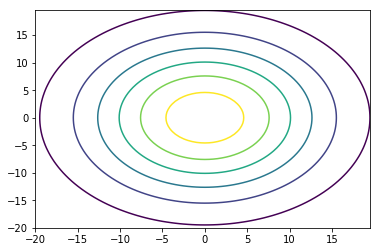

In [48]:
# Plot the prior contours -- this code will only work if k=1
w0vals, w1vals = np.meshgrid(
    np.arange(-20,20,0.5),
    np.arange(-20,20,0.5)
)

pdfvals = np.zeros_like(w0vals)
for i, w0_vec in enumerate(w0vals):
    for j, w0 in enumerate(w0_vec):
        w1 = w1vals[i][j]
        w = np.vstack((w0, w1))
        
        tem = w - mu0
        temp = np.dot(np.linalg.inv(sig0), tem)
        pdfvals[i][j] = -0.5 * np.dot((w - mu0).T, temp)
        
print(pdfvals)
plt.contour(w0vals,w1vals,np.exp(pdfvals))

In [49]:
# Construct the X object, and the test one
testx = np.linspace(-10,50,100)[:,None]
X = np.ones_like(x)

testX = np.ones_like(testx)
for i in range(k):
    X = np.hstack((X,x**(i+1)))
    testX = np.hstack((testX,testx**(i+1)))

#print(testX)

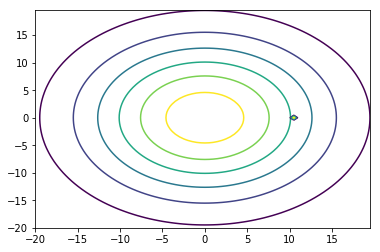

In [50]:
# Compute the posterior mean and covariance
sig_w = np.linalg.inv((1.0/sig_sq) * np.dot(X.T, X) + np.linalg.inv(sig0))
mu_w = (1.0/sig_sq)*np.dot(sig_w, np.dot(X.T,t))

# Plot the prior and posterior contours
posterior_pdfvals = np.zeros_like(w0vals)
for i,w0_vec in enumerate(w0vals):
    for j,w0 in enumerate(w0_vec):
        w1 = w1vals[i][j]
        w = np.vstack((w0,w1))
        posterior_pdfvals[i][j] = -0.5*np.dot((w-mu_w).T,np.dot(np.linalg.inv(sig_w),(w-mu_w)))
plt.contour(w0vals,w1vals,np.exp(pdfvals))
plt.contour(w0vals,w1vals,np.exp(posterior_pdfvals))

<Container object of 3 artists>

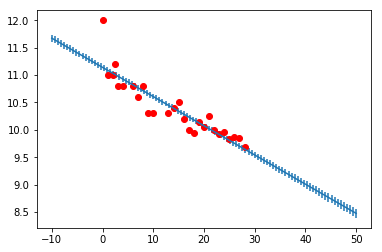

In [51]:
# Compute the predictions
predmu = np.dot(testX, mu_w)
predvar = sig_sq + np.diag(np.dot(testX,np.dot(sig_w,testX.T)))
plt.plot(x,t,'ro')
plt.errorbar(testx,predmu,predvar)

Extra things
==

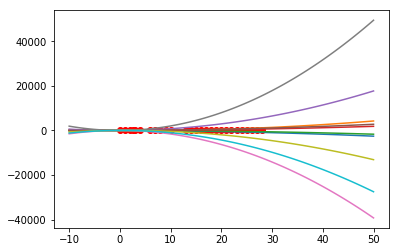

In [46]:
# Plot some samples from the prior
plt.plot(x,t,'ro')
for i in range(10):
    w_samp = np.random.multivariate_normal(mu0.flatten(),sig0)
    plt.plot(testx,np.dot(testX,w_samp))

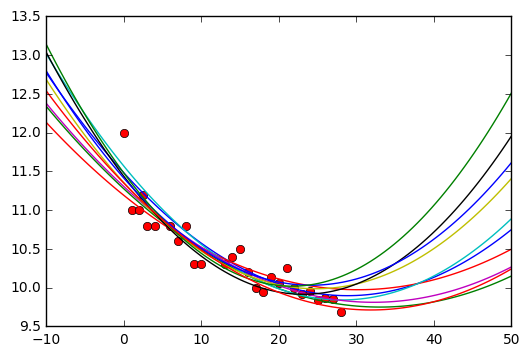

In [140]:
# Plot some samples from the posterior
plt.plot(x,t,'ro')
for i in range(10):
    w_samp = np.random.multivariate_normal(mu_w.flatten(),sig_w)
    plt.plot(testx,np.dot(testX,w_samp))